In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn. metrics import classification_report, accuracy_score, confusion_matrix

from xgboost import XGBClassifier

In [61]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [74]:
df = train.copy()
df = df.drop('id', axis = 1)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [75]:
target = 'NObeyesdad'
df[target].value_counts(normalize = True)

NObeyesdad
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: proportion, dtype: float64

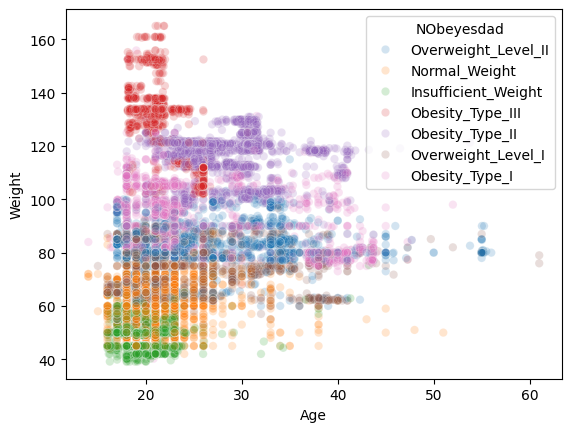

In [76]:
sns.scatterplot(x='Age', y = 'Weight', hue = target, data = data, alpha = 0.2);

In [77]:
# no nulls
#df.isnull().sum()

In [78]:
df.select_dtypes('object').nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              3
MTRANS                            5
NObeyesdad                        7
dtype: int64

In [83]:
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(df[target])
y_train_enc

array([6, 1, 0, ..., 3, 6, 3])

In [124]:
X = df.drop(target, axis = 1)
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X, y_train_enc, test_size=0.2, random_state=44, stratify=y_train_enc)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/qq/_pxy1w012md00pykw2bn68bw0000gn/T/ipykernel_5828/1427838871.py", line 2, in <module>
    X_train, X_val, y_train_enc, y_val_enc = train_test_split(X, y_train_enc, test_size=0.2, random_state=44, stratify=y_train_enc)
  File "/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    if module == "builtins":
  File "/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/sklearn/model_selection/_split.py", line 2646, in train_test_split
  File "/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/sklearn/utils/validation.py", line 453, in indexable
    accept_large_sparse,
  File "/Users/br

In [ ]:
num_cols = list(X.select_dtypes(exclude = 'object').columns)
cat_cols = list(X.select_dtypes(include = 'object').columns)

In [ ]:
preproc_num = make_pipeline(
    StandardScaler()
)

preproc_cat = make_pipeline(
    OneHotEncoder(handle_unknown='ignore', drop='first')
)

preproc_base = make_column_transformer(
    (preproc_num, num_cols),
    (preproc_cat, cat_cols),
    remainder = 'passthrough'
)
preproc = make_pipeline(
    preproc_base,
    XGBClassifier()
)

In [125]:
pipe_model = preproc.fit(X_train, y_train_enc)

In [126]:
y_pred = pipe_model.predict(X_val)

In [127]:
accuracy_score(y_val_enc, y_pred)

0.9019749518304432